In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [4]:
df_min=df[df['9']==1]

In [5]:
df_min.to_csv('wisconsin_minority_train.csv',index=False)
df_min=pd.read_csv('wisconsin_minority_train.csv')

In [6]:
df_majority=df[df['9']==0]
df_majority.to_csv('wisconsin_majority_train.csv',index=False)
df_majority=pd.read_csv('wisconsin_majority_train.csv')

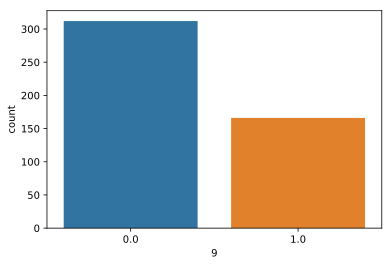

In [7]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(160, 5, 10)
(160, 10)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
96/96 [==============================] - 3s 29ms/step - loss: 0.4283
Epoch 2/500
96/96 [==============================] - 0s 564us/step - loss: 0.3965
Epoch 3/500
96/96 [==============================] - 0s 569us/step - loss: 0.3642
Epoch 4/500
96/96 [==============================] - 0s 642us/step - loss: 0.3335
Epoch 5/500
96/96 [==============================] - 0s 658us/step - loss: 0.3049
Epoch 6/500
96/96 [==============================] - 0s 606us/step - loss: 0.2779
Epoch 7/500
96/96 [==============================] - 0s 564us/step - loss: 0.2532
Epoch 8/500
96/96 [==============================] - 0s 548us/step - loss: 0.2294
Epoch 9/500
96/96 [==============================] - 0s 569us/step - loss: 0.2079
Epoch 10/500
96/96 [==============================] - 0s 554us/step - loss: 0.1882
Epoch 11/500
96/96 [==============================] - 0s 554us/step - loss: 0.1705
Epoch 12/500
96/96 [==============================] - 0s 543us/step - loss: 0.1547
Epoch 13/500
9

96/96 [==============================] - 0s 564us/step - loss: 0.0871
Epoch 100/500
96/96 [==============================] - 0s 613us/step - loss: 0.0870
Epoch 101/500
96/96 [==============================] - 0s 533us/step - loss: 0.0870
Epoch 102/500
96/96 [==============================] - 0s 522us/step - loss: 0.0870
Epoch 103/500
96/96 [==============================] - 0s 522us/step - loss: 0.0869
Epoch 104/500
96/96 [==============================] - 0s 510us/step - loss: 0.0868
Epoch 105/500
96/96 [==============================] - 0s 491us/step - loss: 0.0868
Epoch 106/500
96/96 [==============================] - 0s 585us/step - loss: 0.0867
Epoch 107/500
96/96 [==============================] - 0s 522us/step - loss: 0.0867
Epoch 108/500
96/96 [==============================] - 0s 537us/step - loss: 0.0866
Epoch 109/500
96/96 [==============================] - 0s 564us/step - loss: 0.0866
Epoch 110/500
96/96 [==============================] - 0s 527us/step - loss: 0.0865
Epoch 

96/96 [==============================] - 0s 585us/step - loss: 0.0822
Epoch 197/500
96/96 [==============================] - 0s 679us/step - loss: 0.0823
Epoch 198/500
96/96 [==============================] - 0s 707us/step - loss: 0.0821
Epoch 199/500
96/96 [==============================] - 0s 715us/step - loss: 0.0822
Epoch 200/500
96/96 [==============================] - 0s 632us/step - loss: 0.0822
Epoch 201/500
96/96 [==============================] - 0s 548us/step - loss: 0.0822
Epoch 202/500
96/96 [==============================] - 0s 621us/step - loss: 0.0820
Epoch 203/500
96/96 [==============================] - 0s 533us/step - loss: 0.0820
Epoch 204/500
96/96 [==============================] - 0s 533us/step - loss: 0.0820
Epoch 205/500
96/96 [==============================] - 0s 527us/step - loss: 0.0819
Epoch 206/500
96/96 [==============================] - 0s 564us/step - loss: 0.0818
Epoch 207/500
96/96 [==============================] - 0s 574us/step - loss: 0.0818
Epoch 

96/96 [==============================] - 0s 564us/step - loss: 0.0777
Epoch 294/500
96/96 [==============================] - 0s 553us/step - loss: 0.0775
Epoch 295/500
96/96 [==============================] - 0s 595us/step - loss: 0.0777
Epoch 296/500
96/96 [==============================] - 0s 533us/step - loss: 0.0777
Epoch 297/500
96/96 [==============================] - 0s 554us/step - loss: 0.0774
Epoch 298/500
96/96 [==============================] - 0s 512us/step - loss: 0.0774
Epoch 299/500
96/96 [==============================] - 0s 512us/step - loss: 0.0774
Epoch 300/500
96/96 [==============================] - 0s 480us/step - loss: 0.0775
Epoch 301/500
96/96 [==============================] - 0s 533us/step - loss: 0.0773
Epoch 302/500
96/96 [==============================] - 0s 554us/step - loss: 0.0772
Epoch 303/500
96/96 [==============================] - 0s 554us/step - loss: 0.0775
Epoch 304/500
96/96 [==============================] - 0s 512us/step - loss: 0.0770
Epoch 

96/96 [==============================] - 0s 554us/step - loss: 0.0729
Epoch 391/500
96/96 [==============================] - 0s 591us/step - loss: 0.0728
Epoch 392/500
96/96 [==============================] - 0s 574us/step - loss: 0.0727
Epoch 393/500
96/96 [==============================] - 0s 522us/step - loss: 0.0727
Epoch 394/500
96/96 [==============================] - 0s 554us/step - loss: 0.0725
Epoch 395/500
96/96 [==============================] - 0s 512us/step - loss: 0.0723
Epoch 396/500
96/96 [==============================] - 0s 527us/step - loss: 0.0727
Epoch 397/500
96/96 [==============================] - 0s 522us/step - loss: 0.0725
Epoch 398/500
96/96 [==============================] - 0s 517us/step - loss: 0.0724
Epoch 399/500
96/96 [==============================] - 0s 553us/step - loss: 0.0723
Epoch 400/500
96/96 [==============================] - 0s 512us/step - loss: 0.0726
Epoch 401/500
96/96 [==============================] - 0s 533us/step - loss: 0.0722
Epoch 

96/96 [==============================] - 0s 512us/step - loss: 0.0678
Epoch 488/500
96/96 [==============================] - 0s 554us/step - loss: 0.0681
Epoch 489/500
96/96 [==============================] - 0s 583us/step - loss: 0.0678
Epoch 490/500
96/96 [==============================] - 0s 543us/step - loss: 0.0675
Epoch 491/500
96/96 [==============================] - 0s 517us/step - loss: 0.0677
Epoch 492/500
96/96 [==============================] - 0s 522us/step - loss: 0.0674
Epoch 493/500
96/96 [==============================] - 0s 522us/step - loss: 0.0675
Epoch 494/500
96/96 [==============================] - 0s 512us/step - loss: 0.0676
Epoch 495/500
96/96 [==============================] - 0s 522us/step - loss: 0.0677
Epoch 496/500
96/96 [==============================] - 0s 533us/step - loss: 0.0674
Epoch 497/500
96/96 [==============================] - 0s 574us/step - loss: 0.0672
Epoch 498/500
96/96 [==============================] - 0s 528us/step - loss: 0.0672
Epoch 

In [14]:
model.save('7-24-2019-wisconsin-v1.h5')

In [15]:
Xtrain.shape

(96, 5, 10)

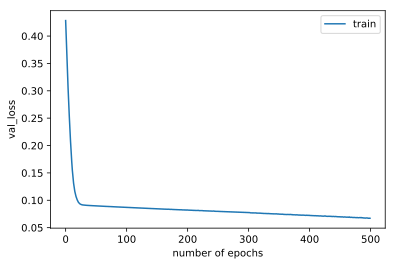

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

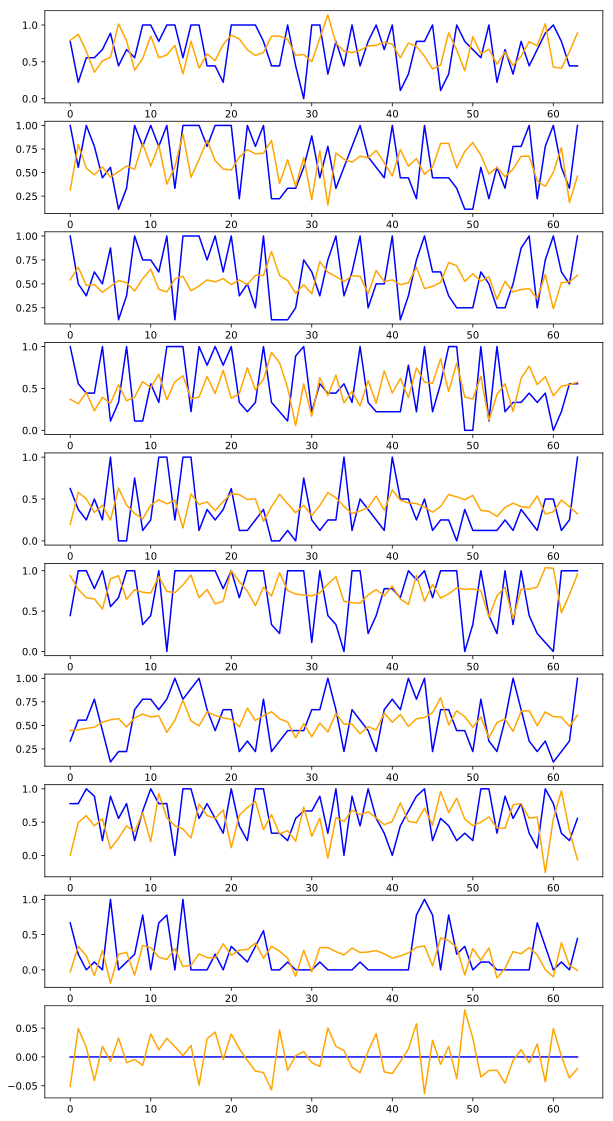

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 0.7908036 ,  0.31394547,  0.5424251 ,  0.37147677,  0.19844472,
         0.9393844 ,  0.44585294,  0.0015572 , -0.02706184, -0.05100724],
       [ 0.8737417 ,  0.7982824 ,  0.67317384,  0.3170238 ,  0.57982534,
         0.76894015,  0.45234334,  0.49268302,  0.33331844,  0.04956401],
       [ 0.6418577 ,  0.5465995 ,  0.484182  ,  0.4525252 ,  0.50180656,
         0.66654825,  0.46828836,  0.59759474,  0.19965789,  0.01669483],
       [ 0.35775828,  0.4760685 ,  0.49356586,  0.23409598,  0.33858323,
         0.6514037 ,  0.4803754 ,  0.443678  , -0.08122598, -0.04105102],
       [ 0.51259696,  0.5594381 ,  0.41287053,  0.39464712,  0.42427522,
         0.52437174,  0.53315544,  0.5499831 ,  0.2743795 ,  0.01837387],
       [ 0.5611127 ,  0.4508292 ,  0.47251114,  0.32223868,  0.24810684,
         0.899206  ,  0.55928105,  0.09899177, -0.1885711 , -0.00766126],
       [ 1.0144479 ,  0.51064944,  0.5343689 ,  0.5439756 ,  0.63024473,
         0.9379441 ,  0.57183504,  0.25720218

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

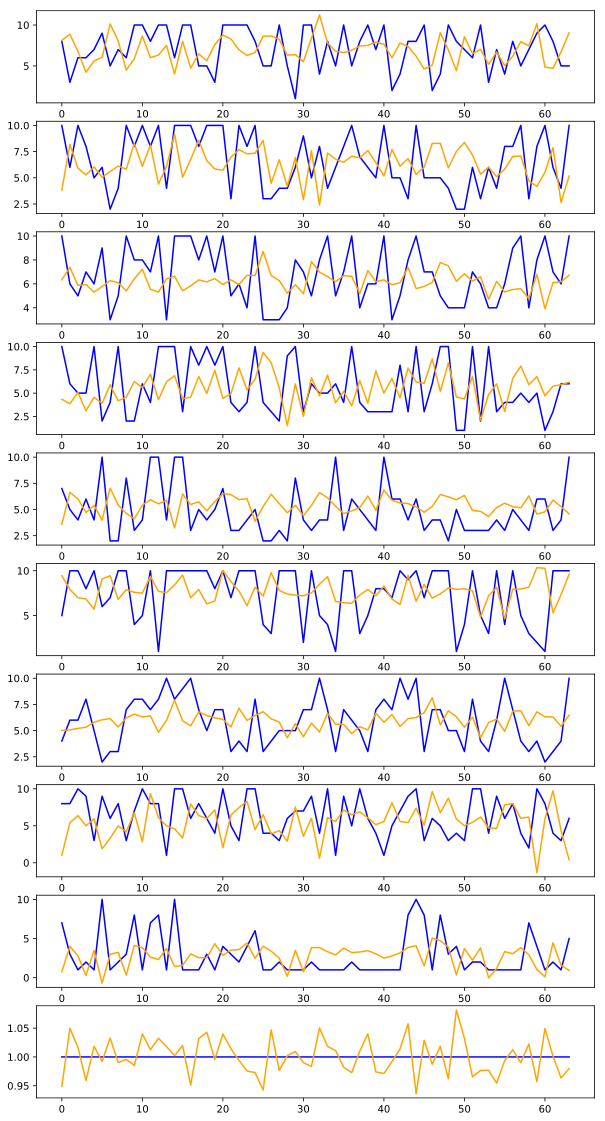

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 0.7908036 ,  0.31394547,  0.5424251 ,  0.37147677,  0.19844472,
         0.9393844 ,  0.44585294,  0.0015572 , -0.02706184, -0.05100724],
       [ 0.8737417 ,  0.7982824 ,  0.67317384,  0.3170238 ,  0.57982534,
         0.76894015,  0.45234334,  0.49268302,  0.33331844,  0.04956401],
       [ 0.6418577 ,  0.5465995 ,  0.484182  ,  0.4525252 ,  0.50180656,
         0.66654825,  0.46828836,  0.59759474,  0.19965789,  0.01669483],
       [ 0.35775828,  0.4760685 ,  0.49356586,  0.23409598,  0.33858323,
         0.6514037 ,  0.4803754 ,  0.443678  , -0.08122598, -0.04105102],
       [ 0.51259696,  0.5594381 ,  0.41287053,  0.39464712,  0.42427522,
         0.52437174,  0.53315544,  0.5499831 ,  0.2743795 ,  0.01837387],
       [ 0.5611127 ,  0.4508292 ,  0.47251114,  0.32223868,  0.24810684,
         0.899206  ,  0.55928105,  0.09899177, -0.1885711 , -0.00766126],
       [ 1.0144479 ,  0.51064944,  0.5343689 ,  0.5439756 ,  0.63024473,
         0.9379441 ,  0.57183504,  0.25720218

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)